In [1]:
import scanpy as sc
import anndata as ad
import gseapy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sc.settings.set_figure_params(dpi=200,dpi_save=800,facecolor="white")

In [3]:
adata = sc.read_h5ad("path/to/your/file.h5ad")

In [4]:
adata.X.max()

8.863389

In [5]:
adata.obs['total_counts'] = adata.X.sum(axis=1)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)

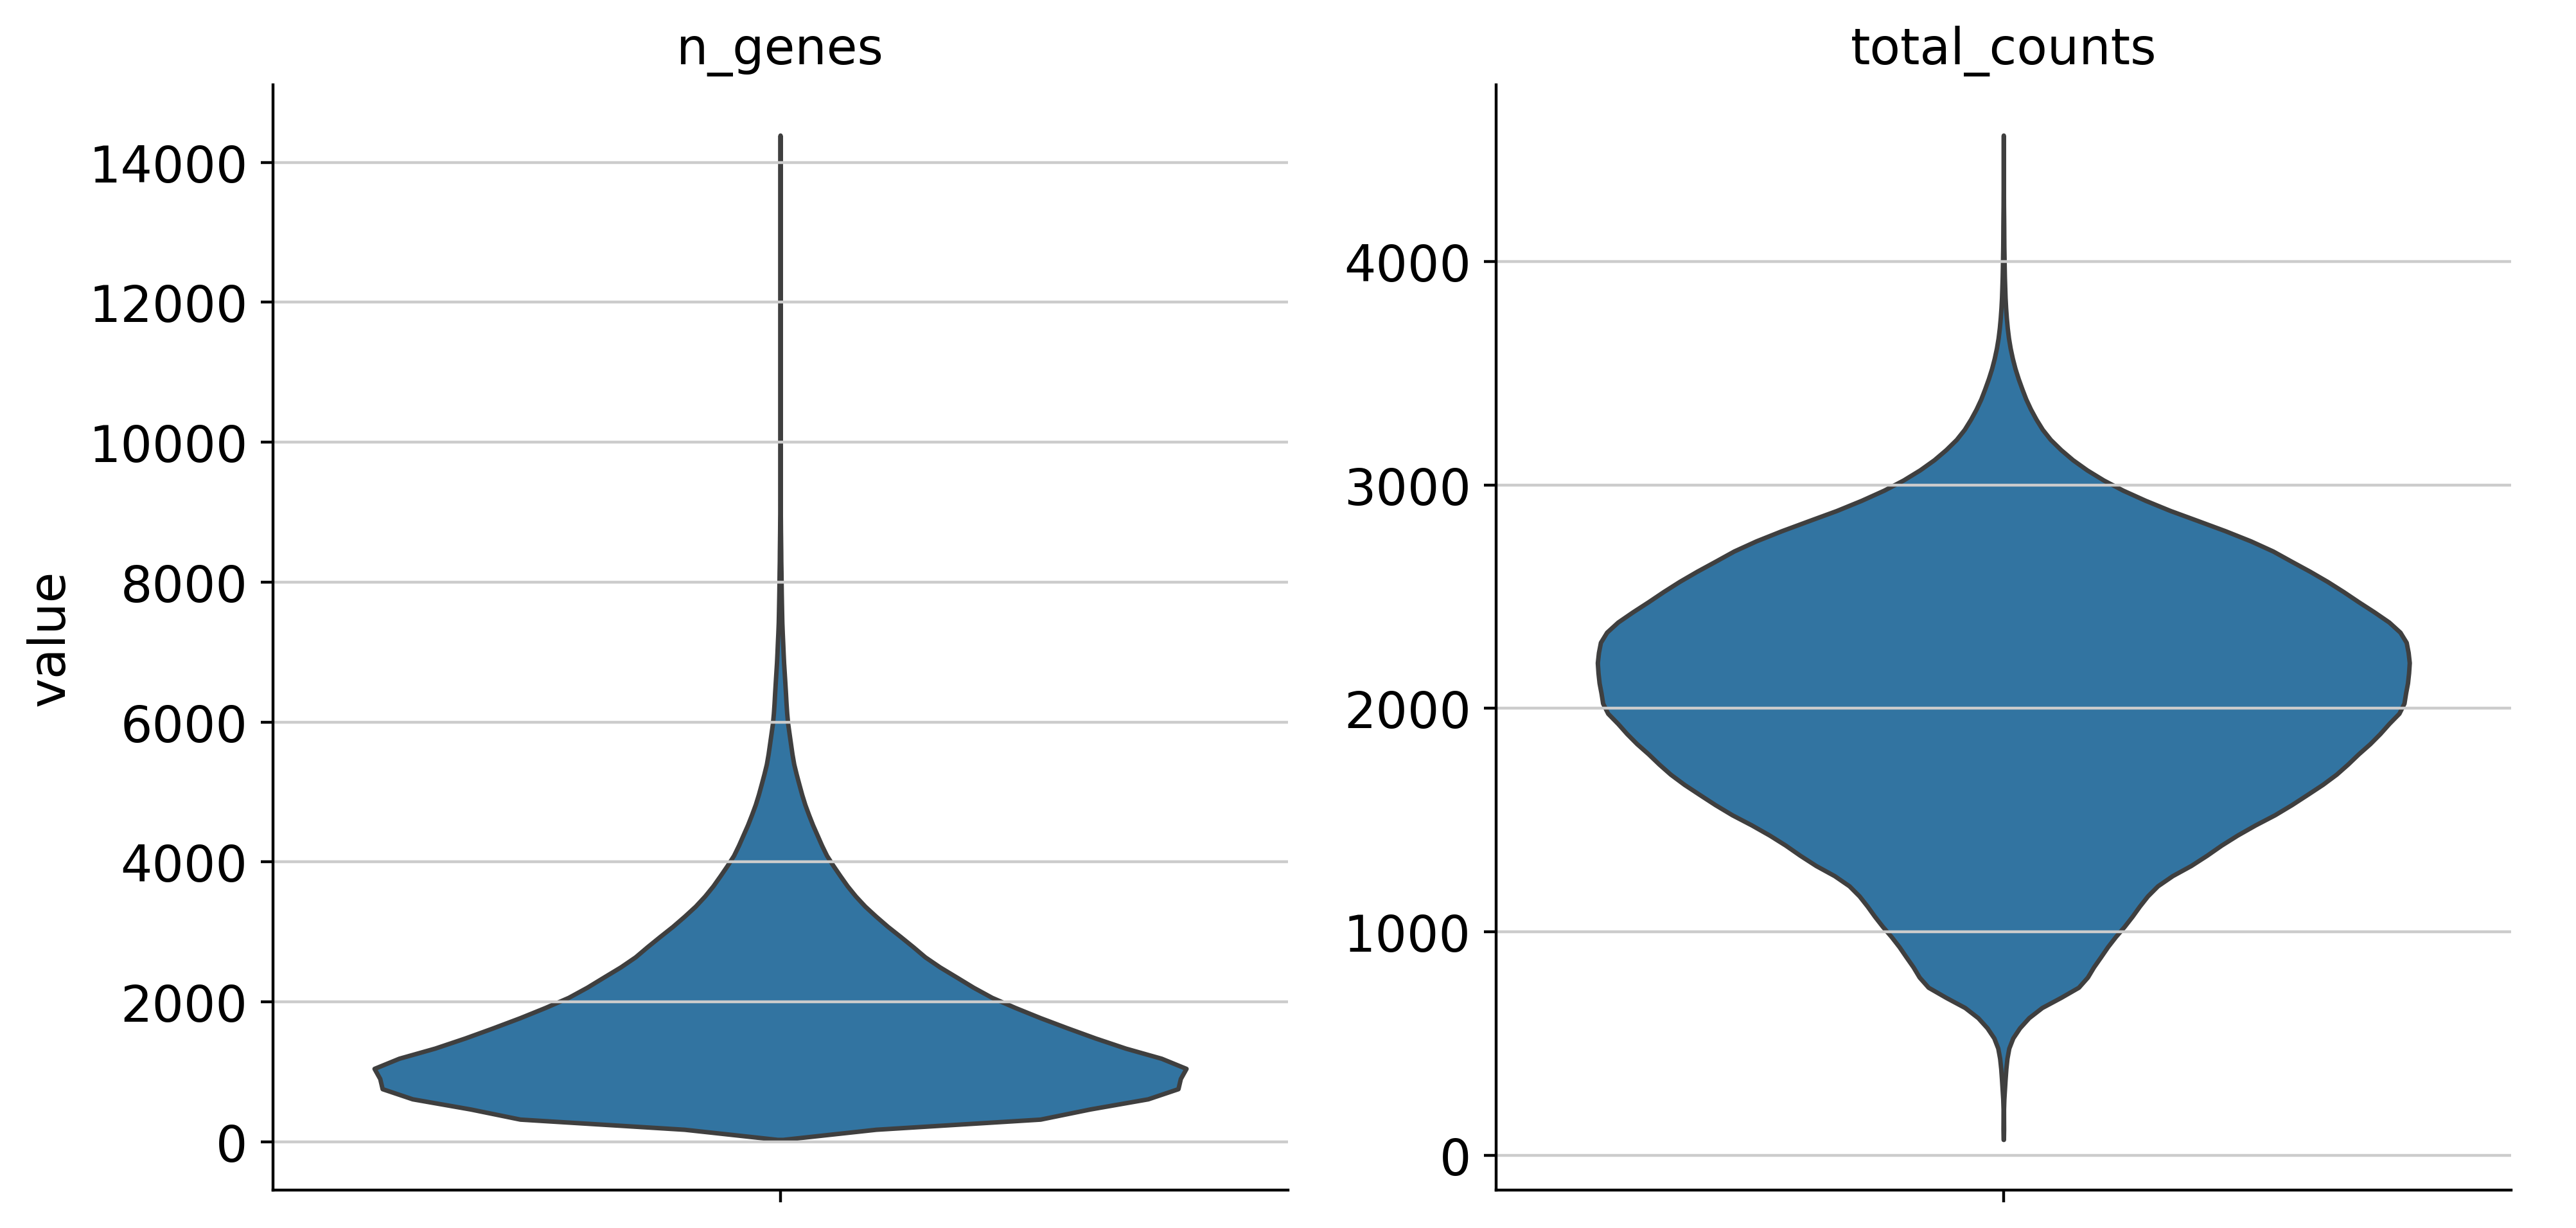

In [6]:
sc.pl.violin(
    adata,
    ["n_genes", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    stripplot=False
)

In [7]:
adata.var.index = adata.var["feature_name"]
adata.var_names = adata.var["feature_name"].astype(str)

In [8]:
adata.raw = adata.copy()

In [9]:
adata.obs['cell_type'].value_counts()

cell_type
unknown                                            623313
alveolar macrophage                                276291
type II pneumocyte                                 156713
respiratory basal cell                             119037
CD8-positive, alpha-beta T cell                    113641
ciliated columnar cell of tracheobronchial tree    113074
elicited macrophage                                 88248
CD4-positive, alpha-beta T cell                     82698
nasal mucosa goblet cell                            72359
classical monocyte                                  64980
capillary endothelial cell                          64583
club cell                                           50366
natural killer cell                                 48439
alveolar type 1 fibroblast cell                     38328
B cell                                              37863
plasma cell                                         33111
type I pneumocyte                                   32306
vein

In [11]:
adata.obs['cell_type']

CGATGTAAGTTACGGG_SC10                                                      alveolar macrophage
cc05p_CATGCCTGTGTGCCTG_carraro_csmc                                                    unknown
ATTCTACCAAGGTTCT_HD68                                               capillary endothelial cell
D062_TGACCCTTCAAACCCA-sub_wang_sub_batch3                      alveolar type 1 fibroblast cell
muc9826_GTCGTGAGAGGA_mayr                      ciliated columnar cell of tracheobronchial tree
                                                                    ...                       
TTGTGGATCGTTCCTG_5-PX5-sub_mould                                           alveolar macrophage
TCAGGATCAAGACGTG_F02526                        ciliated columnar cell of tracheobronchial tree
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl                                alveolar macrophage
022C-b_GGATGTTTCCAAGTAC_adams                                                          unknown
145I-a_GTCGTAACAGTAGAGC_adams                     

In [11]:
marker_gene = ['RMC1','NPC1']

In [ ]:
sc.pl.dotplot(adata, ['NPC1'],"cell_type", cmap='Greens')

In [ ]:
sc.pl.dotplot(adata, ['RMC1'],"cell_type", cmap='Greens')

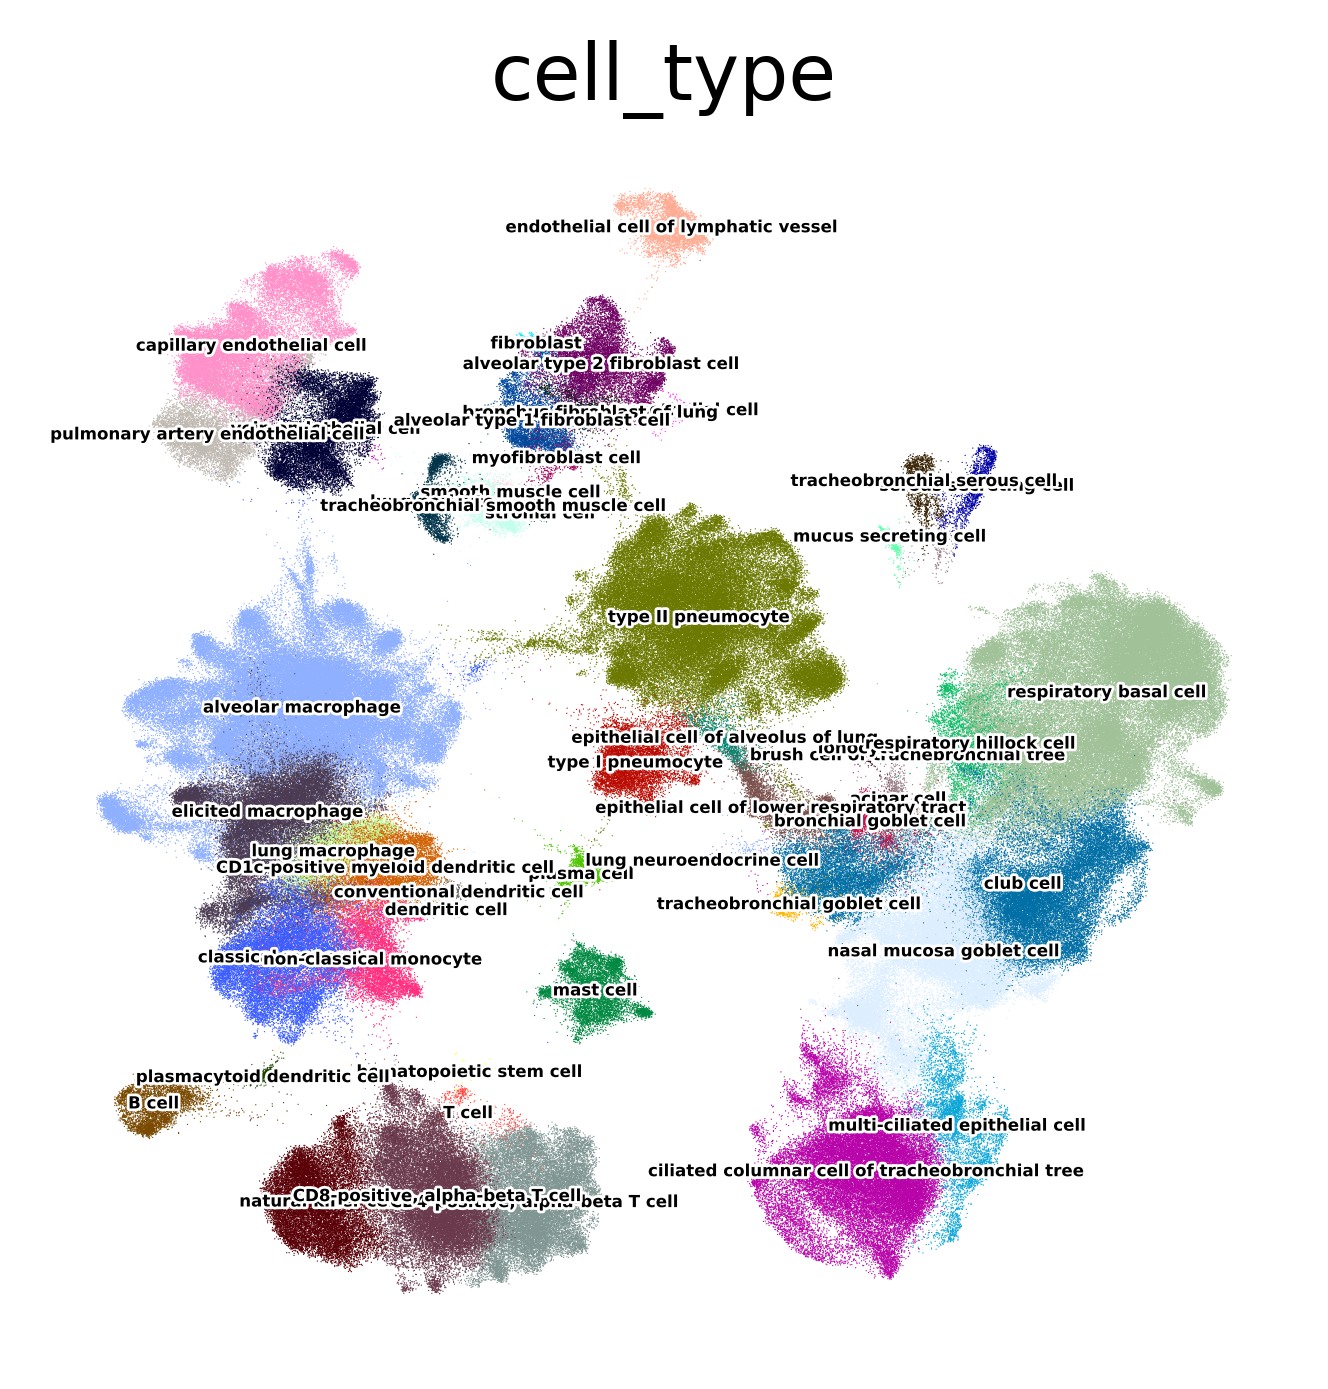

In [121]:
sc.pl.umap(
    adata,
    color="cell_type",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=3,
    legend_fontoutline=1,
    show=False
)
plt.savefig('/home/tianyu/2.GuoQing/0706/UMAP_plot.pdf', format='pdf')

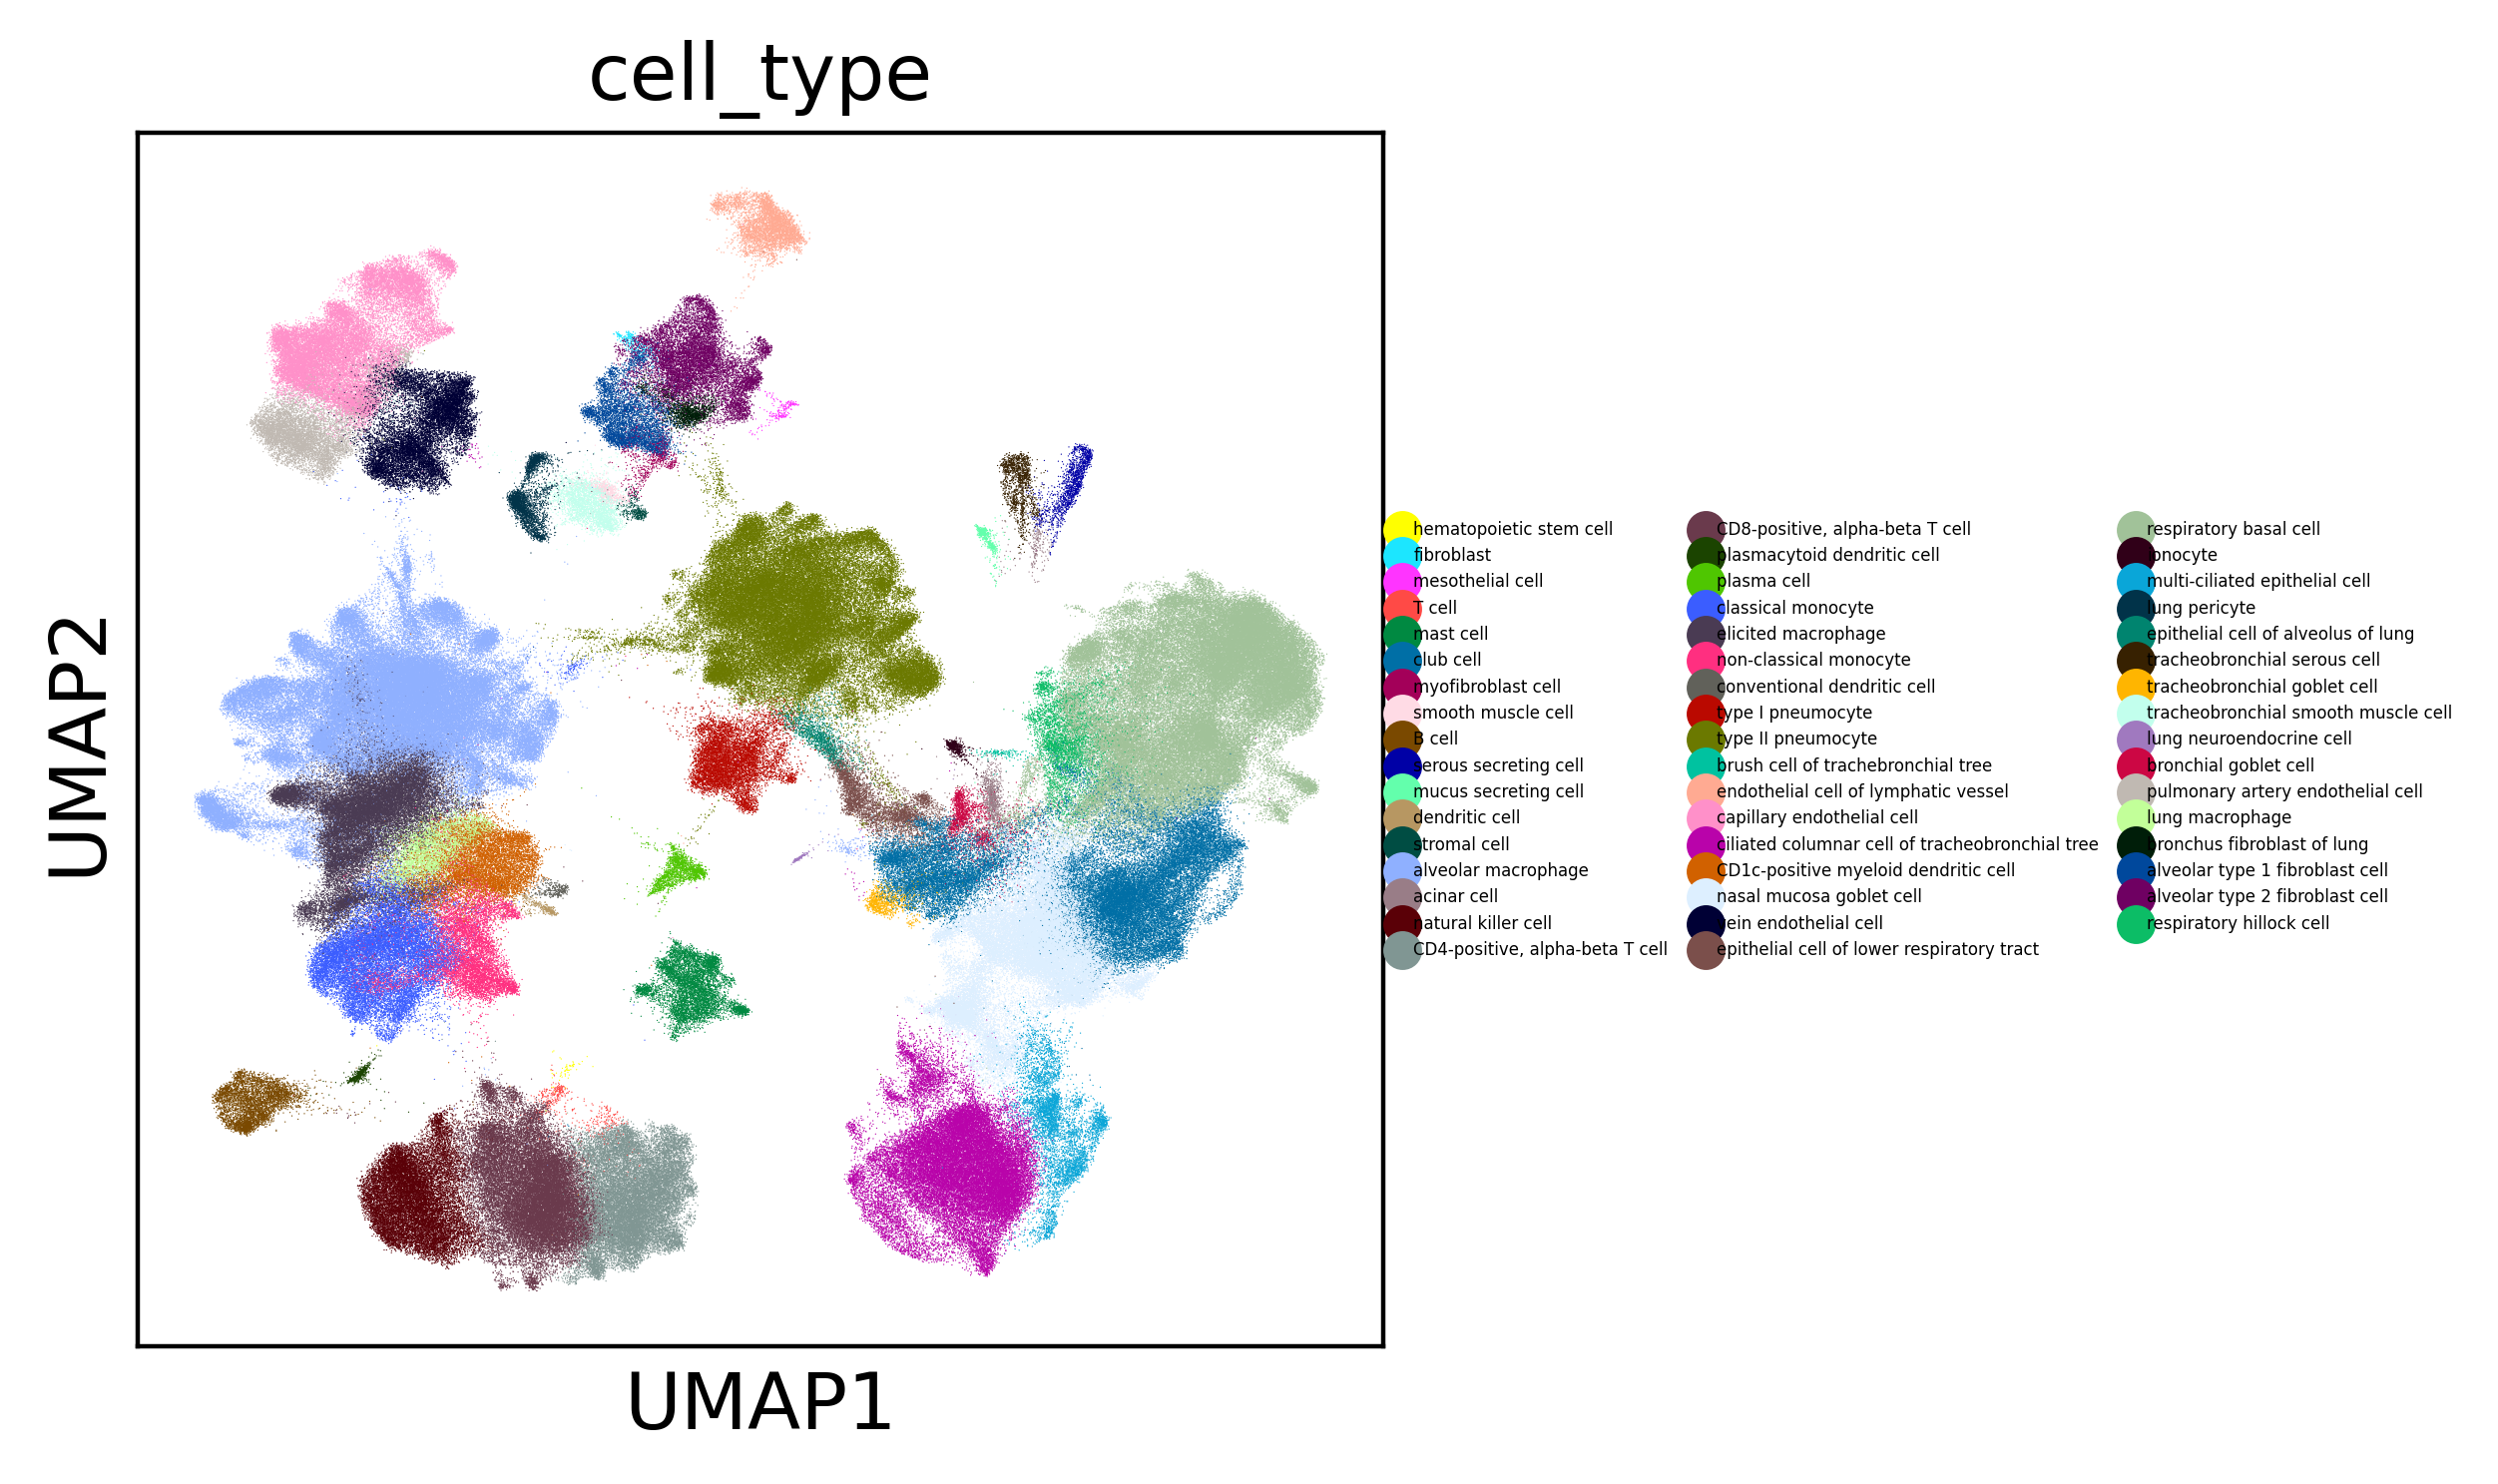

In [122]:
sc.pl.umap(adata, color='cell_type',legend_fontsize=3,show=False)
plt.savefig('/home/tianyu/2.GuoQing/0706/UMAP2_plot.pdf', format='pdf')

In [98]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, '#D3D3D3'), (1, '#FF0000')] 
n_bins = 100  
cmap_name = 'gray_to_darkred'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

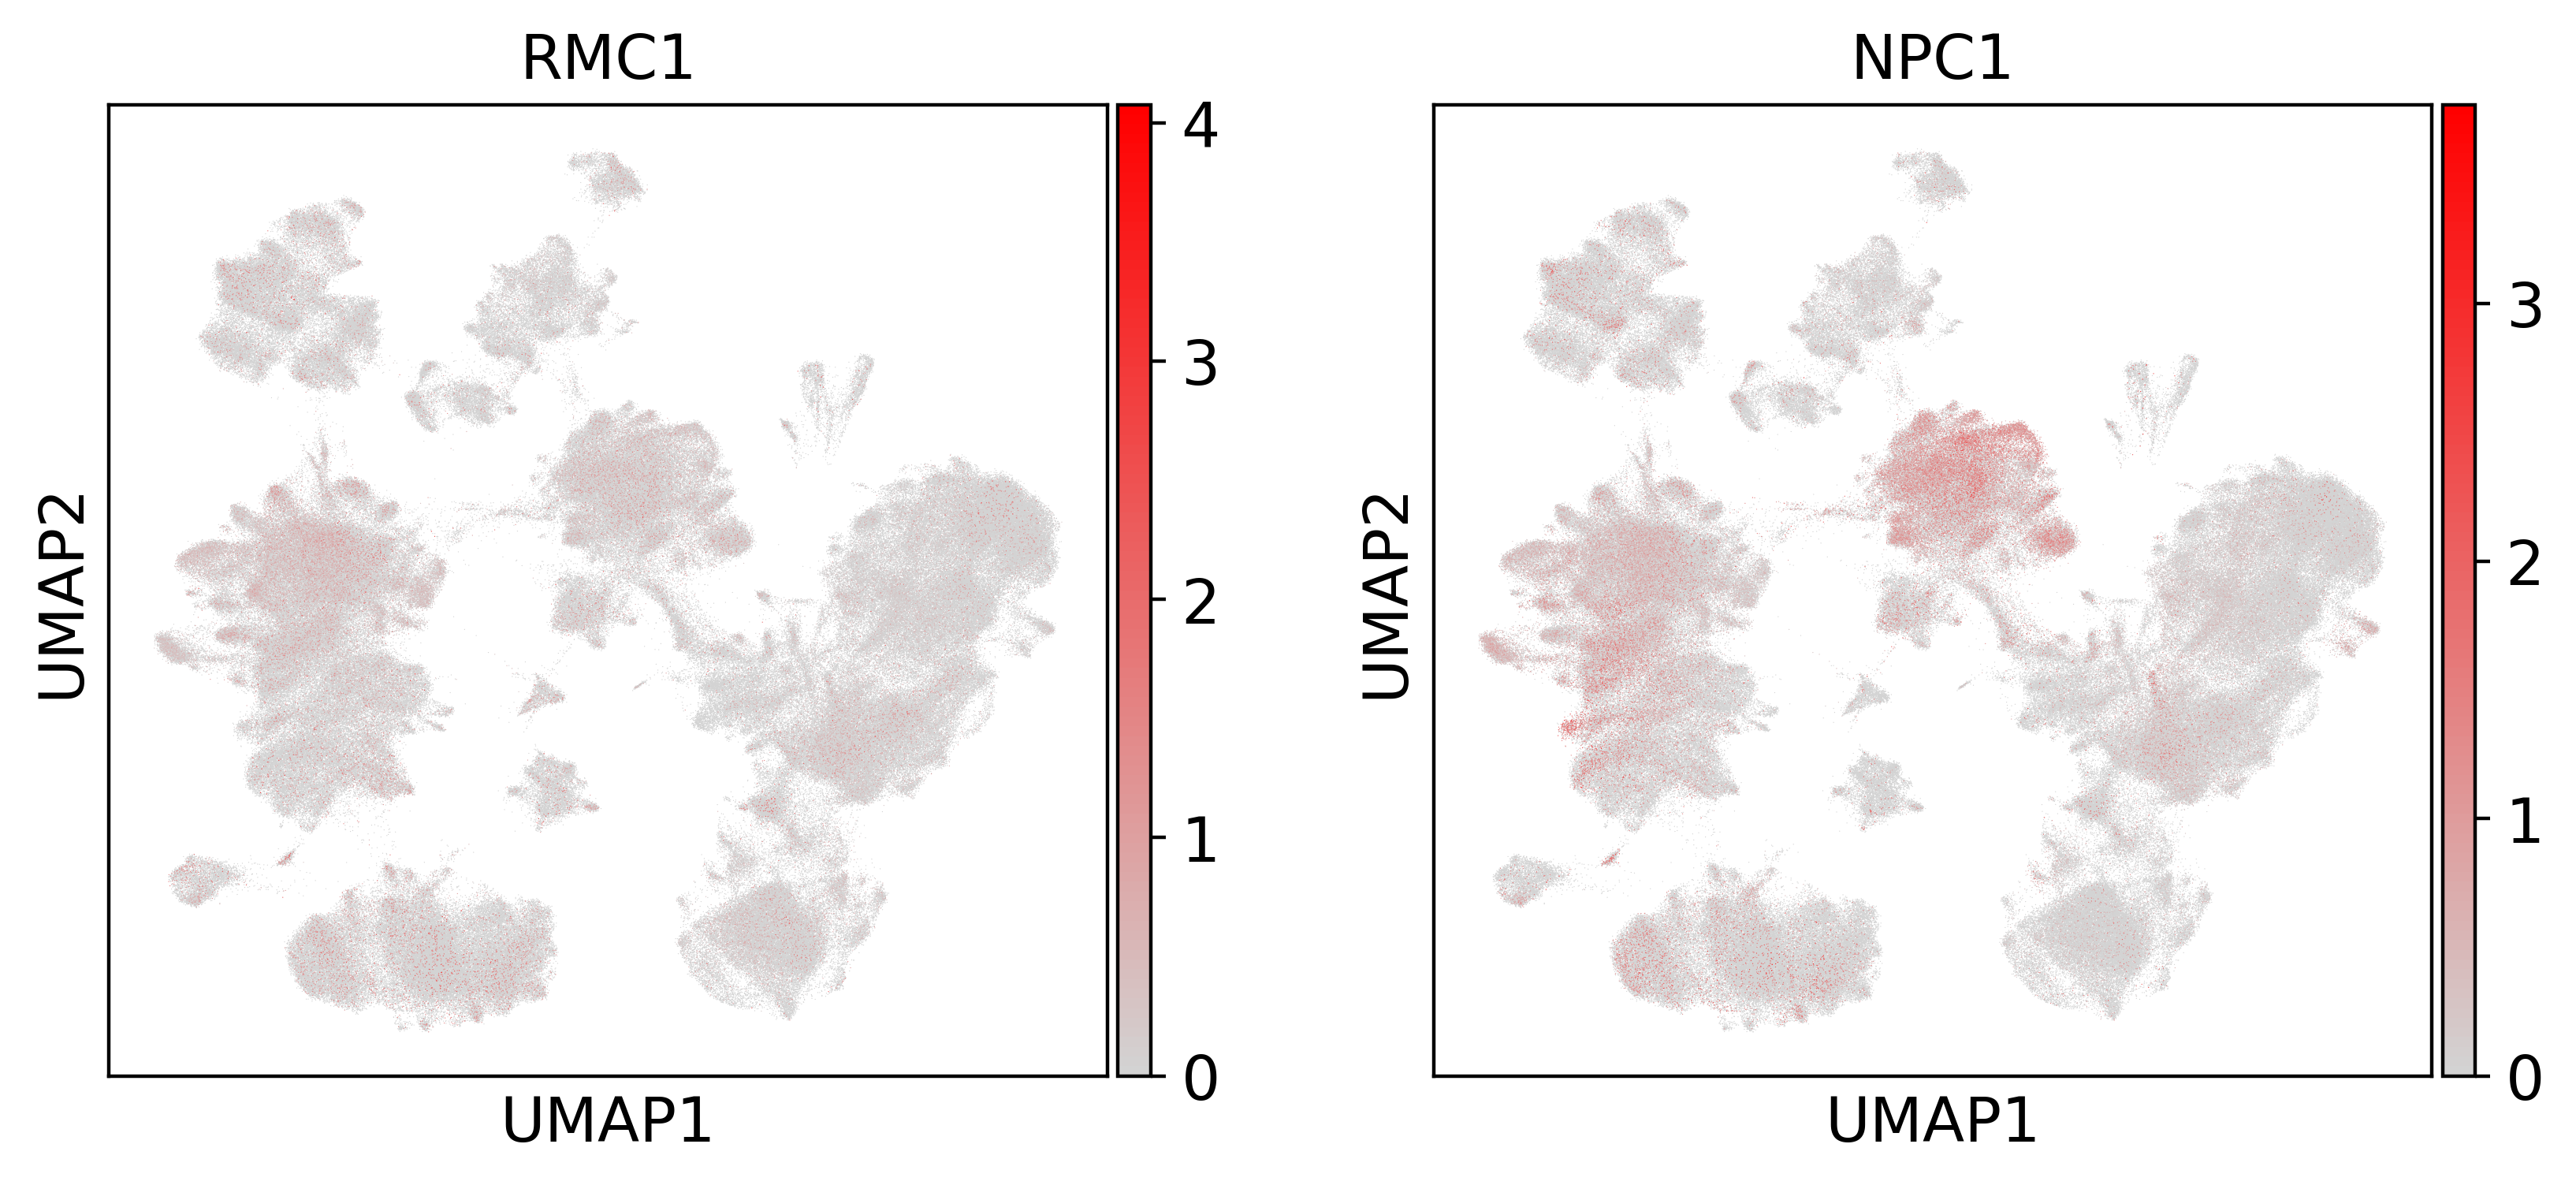

In [123]:
sc.pl.umap(adata, color=marker_gene,color_map=cmap,show=False)
plt.savefig('./feature_plot.pdf', format='pdf')

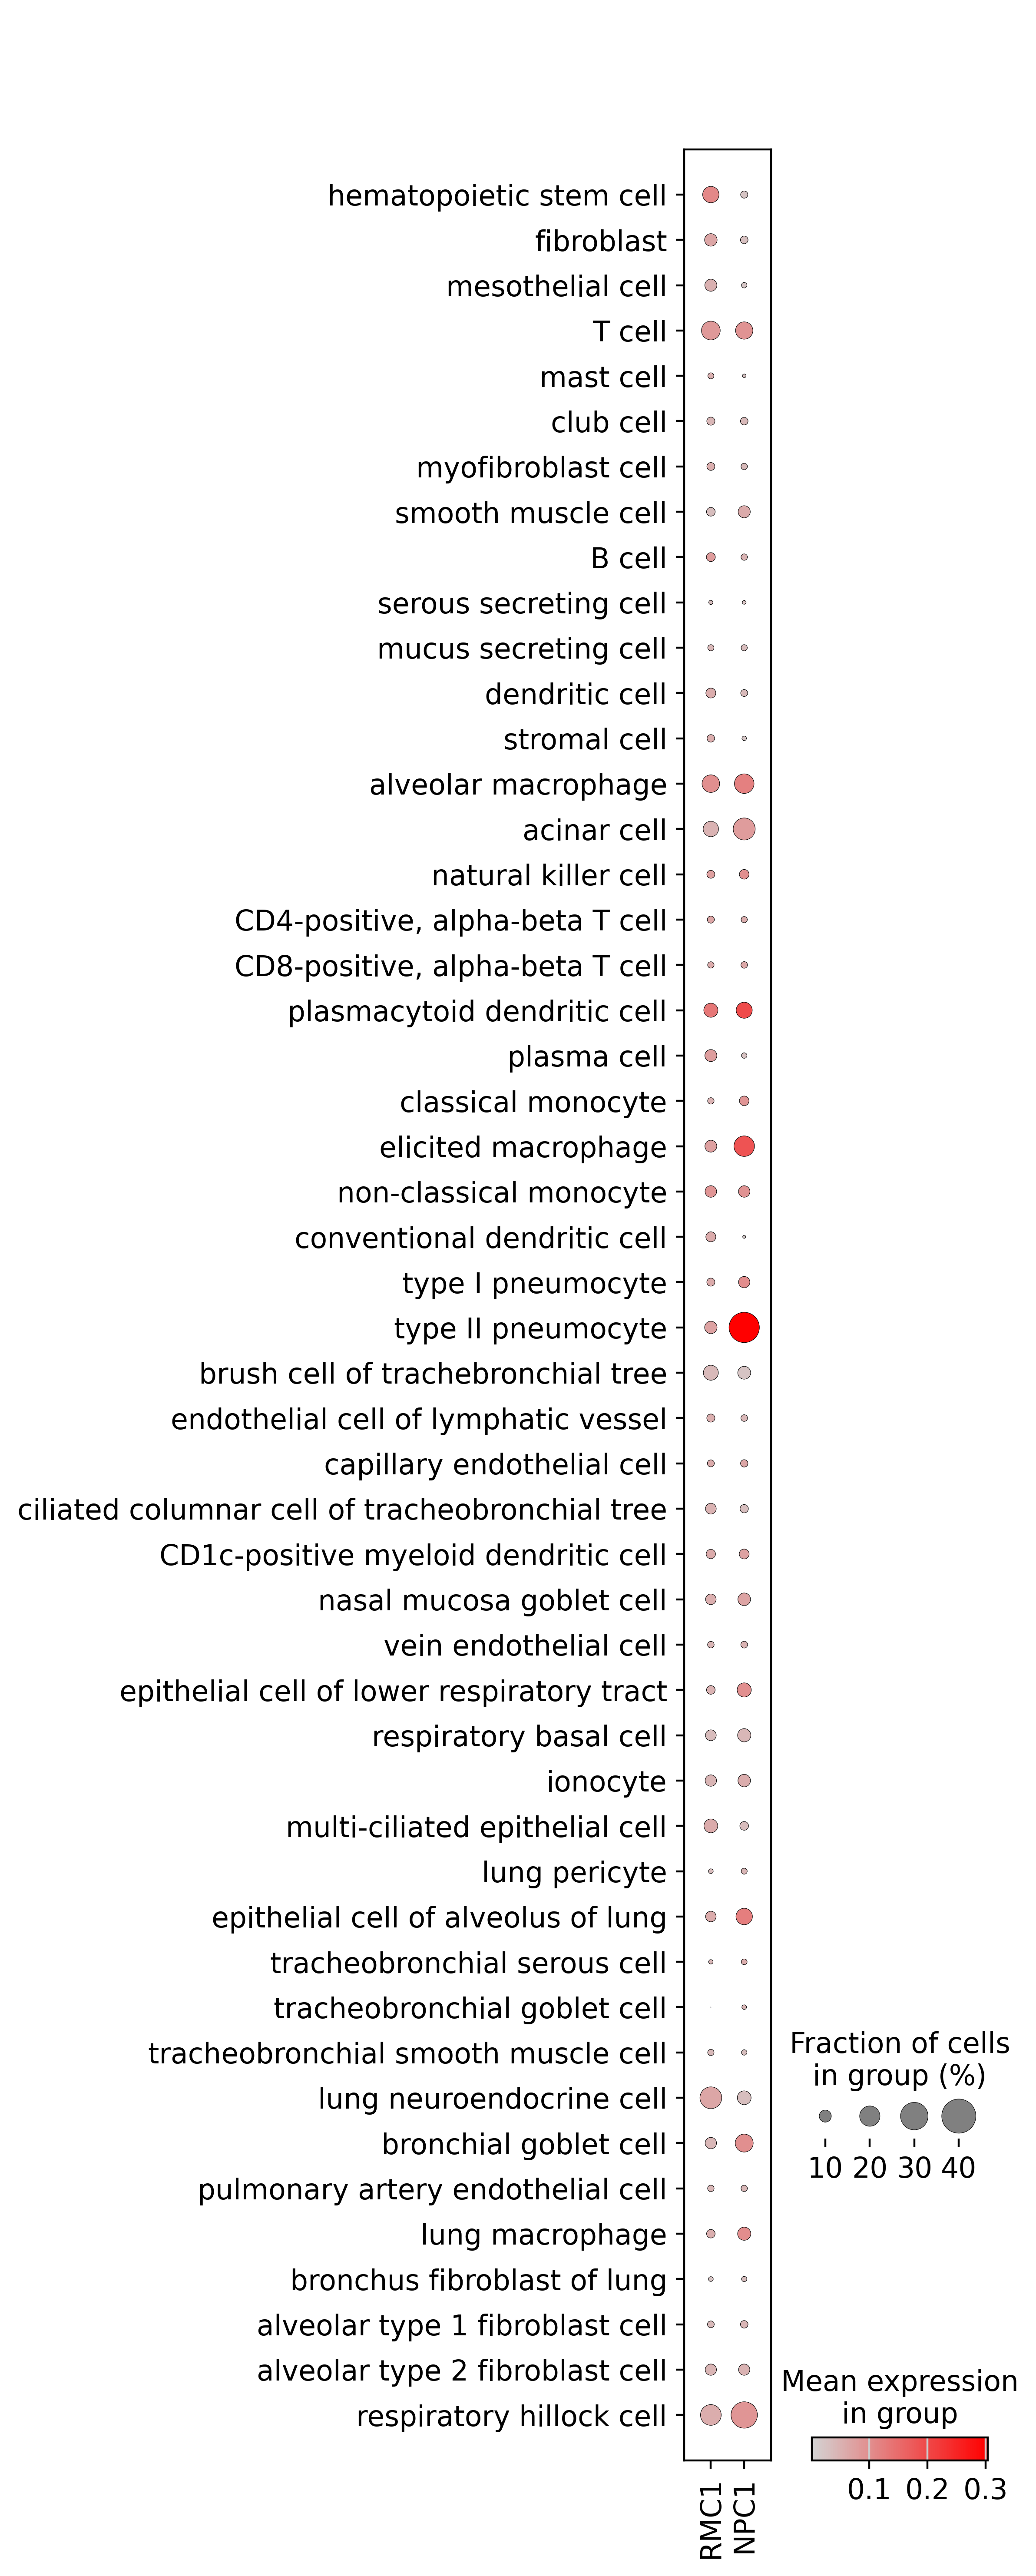

In [124]:
sc.pl.dotplot(adata, marker_gene, "cell_type", cmap=cmap,use_raw=True,show=False)
plt.savefig('./dot_plot.pdf', format='pdf')